In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load and format the data

We're going to load the iris data from the scikit "datasets" package

In [43]:
iris = datasets.load_iris()

#### 1.1 Define the variables

Define your "X" and "y" variables for the analysis

In [44]:
X = iris.data # we only take the first two features.
Y = iris.target

#### 1.2 Standardize X 

In [48]:
X_std = StandardScaler().fit_transform(X)

## 2. Visualize the Data

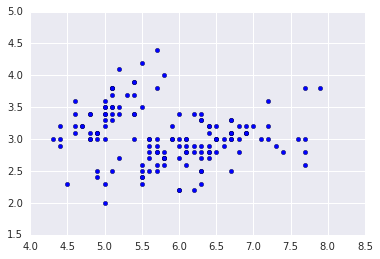

In [54]:
plt.scatter(X[:,0],X[:,1])

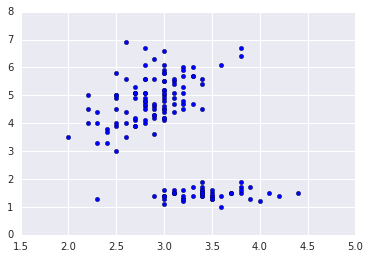

In [55]:
plt.scatter(X[:,1],X[:,2])

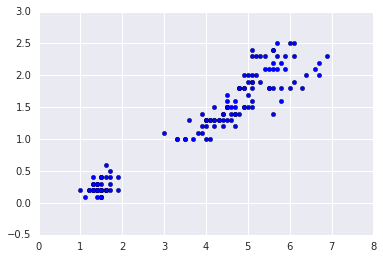

In [56]:
plt.scatter(X[:,2],X[:,3])

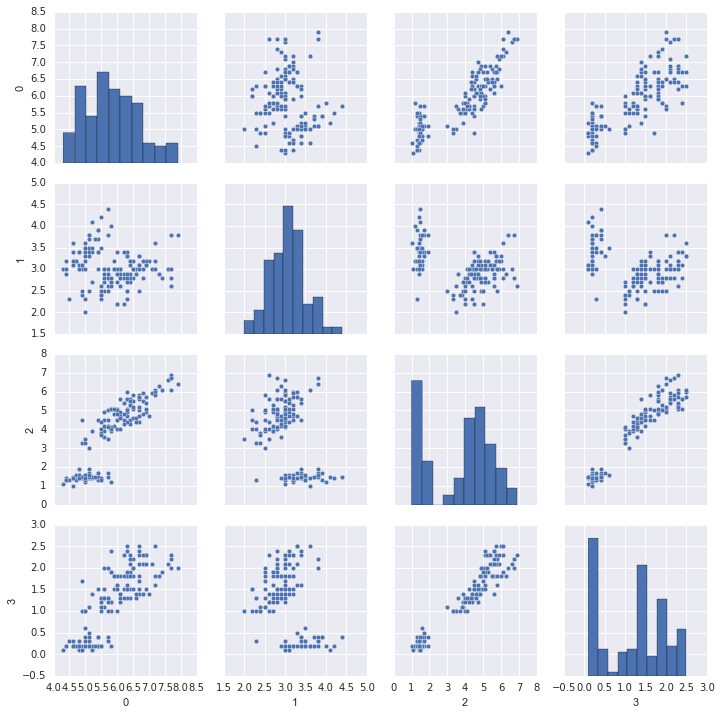

In [58]:
sns.pairplot(pd.DataFrame(X))

## 3. DBSCAN

#### 3.1 Setup the DBSCAN from scikit

Let's set up the DBSCAN from scikit using an epsilon of .5 and a minimum sample number of 5

In [62]:
db = DBSCAN(eps=0.5, min_samples=5,random_state=5).fit(X)

/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/cluster/dbscan_.py:116: DeprecationWarning: The parameter random_state is deprecated in 0.16 and will be removed in version 0.18. DBSCAN is deterministic except for rare border cases.
  category=DeprecationWarning)


#### 3.2 Labels

Next, we'll find the labels calculated by DBSCAN

In [63]:
labels = db.labels_

print labels

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


**What information can we derive from the lables?**: The negative one labels are assigned to noisy samples 

In [64]:
core_samples = np.zeros_like(labels,dtype=bool)
core_samples[db.core_sample_indices_] = True
print core_samples, db.core_sample_indices_

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True False
 False  True False  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False  True False  True  True  True  True False False False
 False False  True  True  True False False  True  True False False False
  True  True False  True  True  True  True  True  True False False False
  True  True False False  True  True  True  True  True False  True  True
  True  True  True  True False  True] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  17  19  20
  21  23  24 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  16,  17,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        58,  61,  63,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 102, 103, 104, 110,
       111, 112, 115, 116, 120, 121, 123, 124, 125, 126, 127, 128, 132,
       133, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 149])

Now, we can use a handy chunk of code from the Scitkit documentation to measure the performance of our model 

In [66]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(Y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(Y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 0.560
Completeness: 0.657
V-measure: 0.604
Adjusted Rand Index: 0.521
Adjusted Mutual Information: 0.554
Silhouette Coefficient: 0.486


**What do these metrics tell us?**

#### 3.3 Plot the resulting clusters

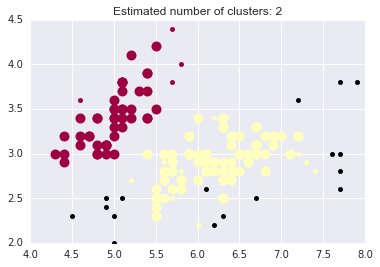

In [73]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()